In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip install imblearn
!pip install lightgbm
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.5/599.5 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import optuna
import datetime as dt
import hashlib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [4]:
df = pd.read_csv("/content/drive/MyDrive/datasets/frauddata.csv")

In [5]:
def hash_ssn(ssn):
    return hashlib.sha256(ssn.encode()).hexdigest()

df['hashed_ssn'] = df['ssn'].apply(hash_ssn)

In [6]:
df.iloc[:, 1:]

,cc_num,first,last,gender,city,state,zip,city_pop,job,dob,acct_num,trans_num,trans_date,trans_time,unix_time,category,amt,is_fraud,merchant,hashed_ssn
0,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,c036244703adb9d5392f4027d9d4b38d,2021-07-31,02:30:01,1627678801,grocery_pos,337.54,1,fraud_Kovacek,b259f8bf3af3ae5794de5295bbe43bce4964135a9748e5...
1,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,42f000b0b3b0ef534e5b8ef9ec1db13a,2021-08-01,22:37:41,1627837661,personal_care,21.13,1,fraud_Bradtke,b259f8bf3af3ae5794de5295bbe43bce4964135a9748e5...
2,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,543037b1baf088961e58d00b705f4bcc,2021-08-01,23:02:09,1627839129,personal_care,22.61,1,fraud_Kozey-Kuhlman,b259f8bf3af3ae5794de5295bbe43bce4964135a9748e5...
3,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,00a4e08643edebf9277c2967676f6a26,2021-08-01,22:27:24,1627837044,health_fitness,17.32,1,fraud_Hills,b259f8bf3af3ae5794de5295bbe43bce4964135a9748e5...
4,4361337605230458,Kristie,Davis,F,Chandler,OK,74834,7590,Chief Strategy Officer,1987-06-12,349734538563,492c4412815306718f686fc5b459a285,2021-12-02,02:28:51,1638392331,misc_pos,75.82,0,fraud_Kemmer-Buckridge,b259f8bf3af3ae5794de5295bbe43bce4964135a9748e5...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646689,4888818930461631,Kristen,Wilson,F,Pleasant Garden,NC,27313,6962,Museum/gallery curator,1969-09-14,834942757900,b2d8cfd9502a982b910edeea05baebe8,2023-06-02,22:05:19,1685723719,kids_pets,5.10,0,fraud_Cartwright PLC,eaabd2b800f35ebc8b9985549d4b79a276ac9920f03ded...
2646690,4888818930461631,Kristen,Wilson,F,Pleasant Garden,NC,27313,6962,Museum/gallery curator,1969-09-14,834942757900,b688d8f1f21483947654a25891dd80fe,2023-07-27,12:19:49,1690440589,kids_pets,7.05,0,fraud_Waelchi Inc,eaabd2b800f35ebc8b9985549d4b79a276ac9920f03ded...
2646691,4888818930461631,Kristen,Wilson,F,Pleasant Garden,NC,27313,6962,Museum/gallery curator,1969-09-14,834942757900,f12b8b2933bb5280f4e8f41dd8d91295,2023-10-13,20:40:24,1697209824,personal_care,2.31,0,fraud_Emmerich-Rau,eaabd2b800f35ebc8b9985549d4b79a276ac9920f03ded...
2646692,4888818930461631,Kristen,Wilson,F,Pleasant Garden,NC,27313,6962,Museum/gallery curator,1969-09-14,834942757900,b243e1332abfcd5735cb0631e2fcc168,2023-05-19,19:03:38,1684503218,home,8.35,0,fraud_Renner Ltd,eaabd2b800f35ebc8b9985549d4b79a276ac9920f03ded...


In [7]:
df.drop(columns=["trans_date","trans_time","unix_time","trans_num","dob","city_pop","zip","ssn","city","acct_num","cc_num","first","last"], inplace=True)
df

,gender,state,job,category,amt,is_fraud,merchant,hashed_ssn
0,F,OK,Chief Strategy Officer,grocery_pos,337.54,1,fraud_Kovacek,b259f8bf3af3ae5794de5295bbe43bce4964135a9748e5...
1,F,OK,Chief Strategy Officer,personal_care,21.13,1,fraud_Bradtke,b259f8bf3af3ae5794de5295bbe43bce4964135a9748e5...
2,F,OK,Chief Strategy Officer,personal_care,22.61,1,fraud_Kozey-Kuhlman,b259f8bf3af3ae5794de5295bbe43bce4964135a9748e5...
3,F,OK,Chief Strategy Officer,health_fitness,17.32,1,fraud_Hills,b259f8bf3af3ae5794de5295bbe43bce4964135a9748e5...
4,F,OK,Chief Strategy Officer,misc_pos,75.82,0,fraud_Kemmer-Buckridge,b259f8bf3af3ae5794de5295bbe43bce4964135a9748e5...
...,...,...,...,...,...,...,...,...
2646689,F,NC,Museum/gallery curator,kids_pets,5.10,0,fraud_Cartwright PLC,eaabd2b800f35ebc8b9985549d4b79a276ac9920f03ded...
2646690,F,NC,Museum/gallery curator,kids_pets,7.05,0,fraud_Waelchi Inc,eaabd2b800f35ebc8b9985549d4b79a276ac9920f03ded...
2646691,F,NC,Museum/gallery curator,personal_care,2.31,0,fraud_Emmerich-Rau,eaabd2b800f35ebc8b9985549d4b79a276ac9920f03ded...
2646692,F,NC,Museum/gallery curator,home,8.35,0,fraud_Renner Ltd,eaabd2b800f35ebc8b9985549d4b79a276ac9920f03ded...


In [8]:
labelencoder = LabelEncoder()

df["gender"] = labelencoder.fit_transform(df["gender"])

In [9]:
df.set_index("hashed_ssn", drop=True, inplace=True)

In [10]:
cat_cols = ["state","job","category","merchant"]

In [11]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [12]:
df = one_hot_encoder(df, cat_cols)

In [13]:
rbscaler = RobustScaler()
df["amt"] = rbscaler.fit_transform(df["amt"].to_frame())

In [14]:
def f1_score(y_true, y_pred):
        y_true = K.cast(y_true, 'float32')
        y_pred = tf.round(y_pred)
        y_pred = K.cast(y_pred, 'float32')

        tp = K.sum(K.cast(y_true * y_pred, 'float32'), axis=0)
        fp = K.sum(K.cast((1 - y_true) * y_pred, 'float32'), axis=0)
        fn = K.sum(K.cast(y_true * (1 - y_pred), 'float32'), axis=0)

        precision = tp / (tp + fp + K.epsilon())
        recall = tp / (tp + fn + K.epsilon())
        f1 = 2 * precision * recall / (precision + recall + K.epsilon())
        return K.mean(f1)

In [15]:
X = df.drop(columns="is_fraud")
y = df["is_fraud"]

In [16]:
smote = SMOTE()

X_resamp, y_resamp = smote.fit_resample(X,y)

In [17]:
input_dim = X_resamp.shape[1]

In [18]:
model = keras.Sequential([
    Dense(32, input_dim=input_dim, activation="relu"),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dense(2, activation="softmax")
])

In [19]:
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

In [20]:
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy", f1_score])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                36224     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 38466 (150.26 KB)
Trainable params: 38466 (150.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
y_resamp = to_categorical(y_resamp)

In [22]:
X_resamp = np.array(X_resamp, dtype="float32")
y_resamp = np.array(y_resamp, dtype="int32")

In [23]:
history = model.fit(X_resamp, y_resamp, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
131864/131864 [==============================] - 317s 2ms/step - loss: 0.0517 - accuracy: 0.9829 - f1_score: 0.9808 - val_loss: 0.0024 - val_accuracy: 0.9989 - val_f1_score: 0.4997
Epoch 2/10
131864/131864 [==============================] - 313s 2ms/step - loss: 0.0216 - accuracy: 0.9938 - f1_score: 0.9931 - val_loss: 0.0011 - val_accuracy: 0.9997 - val_f1_score: 0.4999
Epoch 3/10
131864/131864 [==============================] - 314s 2ms/step - loss: 0.0228 - accuracy: 0.9935 - f1_score: 0.9928 - val_loss: 0.0017 - val_accuracy: 0.9997 - val_f1_score: 0.4999
Epoch 4/10
131864/131864 [==============================] - 312s 2ms/step - loss: 0.0238 - accuracy: 0.9933 - f1_score: 0.9926 - val_loss: 0.0017 - val_accuracy: 0.9997 - val_f1_score: 0.4999
Epoch 5/10
131864/131864 [==============================] - 309s 2ms/step - loss: 0.0246 - accuracy: 0.9933 - f1_score: 0.9926 - val_loss: 0.0019 - val_accuracy: 0.9997 - val_f1_score: 0.4999
Epoch 6/10
131864/131864 [==============

In [24]:
dnn_predict = model.predict(X_resamp)

164830/164830 [==============================] - 222s 1ms/step


In [25]:
dnn_predict.shape

(5274544, 2)

In [26]:
X_resamp.shape

(5274544, 1131)

In [27]:
lgbm_X, lgbm_y = smote.fit_resample(X,y)

In [28]:
X_combined = np.hstack([lgbm_X,dnn_predict])

In [30]:
test_num = int(len(X_combined) * 0.2)

random_indexes = np.random.choice(len(X_combined), size=test_num, replace=False)

test = X_combined[random_indexes]
y = lgbm_y.iloc[random_indexes]

train_indexes = np.setdiff1d(np.arange(len(X_combined)), random_indexes)

train_X = X_combined[train_indexes]
train_y = lgbm_y.iloc[train_indexes]

In [31]:
lgbm_model = LGBMClassifier()

lgbm_model.fit(train_X, train_y)

[LightGBM] [Info] Number of positive: 2110174, number of negative: 2109462
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.884641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3025
[LightGBM] [Info] Number of data points in the train set: 4219636, number of used features: 1133
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500084 -> initscore=0.000337
[LightGBM] [Info] Start training from score 0.000337


LGBMClassifier()

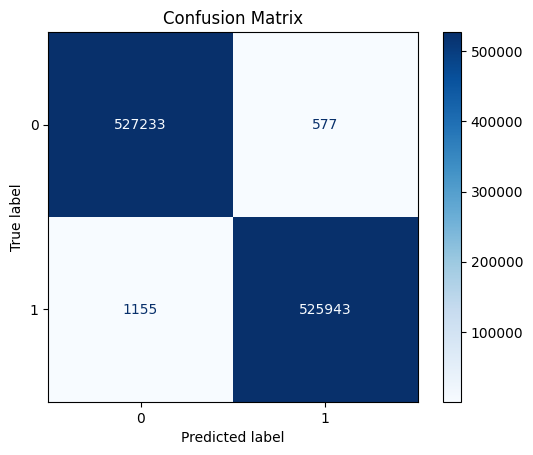

In [32]:
y_pred = lgbm_model.predict(test)
y_true = y

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [33]:
acc = accuracy_score(y_pred, y_true)
print(f"Accuracy: {acc}")

Accuracy: 0.9983581506633754


In [34]:
precision = precision_score(y_pred, y_true)
print(f"Precision: {precision}")

Precision: 0.9978087566259026


In [35]:
recall = recall_score(y_pred, y_true)
print(f"Recall: {recall}")

Recall: 0.9989041251994226


In [36]:
f1 = f1_score(y_pred, y_true)
print(f"F1: {f1}")

F1: 0.99835604429245


In [37]:
cl_report = classification_report(y_pred, y_true)
print(cl_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    528388
           1       1.00      1.00      1.00    526520

    accuracy                           1.00   1054908
   macro avg       1.00      1.00      1.00   1054908
weighted avg       1.00      1.00      1.00   1054908

